---
# Introduction to Machine Learning - Lab 1
---

Following are the steps to import a dataset (custom) and use the LR model to predict values depending on the dataset provided.

### Index:

* "file1" is the training dataset. It contains the 'area' along with the corresponding 'price'.
* "file2" is the test dataset. It ONLY contains the values for 'area' and will be used to check the accuracy of the prediction done by the model.

---

# Importing the training dataset
---
While using this, add some more values to the list so that you can train the model better.

In [45]:
import csv
with open("file1.csv","r") as f1:
    data=csv.reader(f1)
    for i in f1:
        print(i)

area,price

2600,550000

3000,565000

3200,610000

3600,680000

4000,725000



# Importing the test dataset

---

While using this, add some more values to the list so that you can get new predictions.

In [46]:
import csv
with open("file2.csv","r") as f2:
    data=csv.reader(f2)
    for i in f2:
        print(i)

area

2600

3000

3200

3600

4000

900

1000

1100

2000

300

500



# Converting training dataset into dataframe

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd

df=pd.read_csv('file1.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


# Plotting the Dataframe

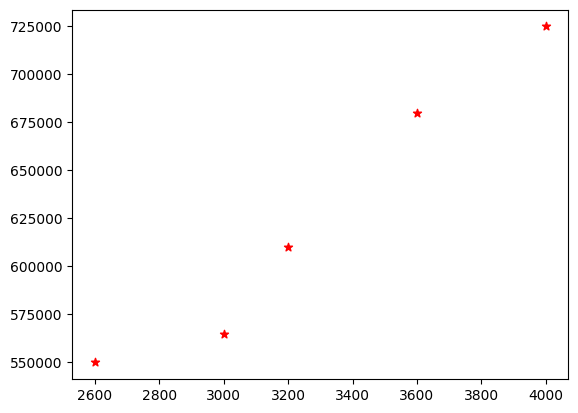

In [48]:
plt.scatter(df.area,df.price,color="red",marker="*")

# Initiating the Linear Regression Model

In [49]:
reg=linear_model.LinearRegression()
reg.fit(df[["area"]],df.price)

LinearRegression()

# Finding the slope of the best fit line

---

*The slope 'm' from y=mx+c*



In [50]:
reg.coef_

array([135.78767123])

# Finding the intercept of the best fit line


---


*The constant 'c' from y=mx+c*

In [51]:
reg.intercept_

180616.43835616432

# Predicting the output of the training dataset from the LR model obtained

In [52]:
d=pd.read_csv("file2.csv")
d

,area
0,2600
1,3000
2,3200
3,3600
4,4000
5,900
6,1000
7,1100
8,2000
9,300


# Converting the output data to csv format

In [53]:
p=reg.predict(d)
p
d["price"]=p
d.to_csv

<bound method NDFrame.to_csv of     area          price
0   2600  533664.383562
1   3000  587979.452055
2   3200  615136.986301
3   3600  669452.054795
4   4000  723767.123288
5    900  302825.342466
6   1000  316404.109589
7   1100  329982.876712
8   2000  452191.780822
9    300  221352.739726
10   500  248510.273973>

# Plotting the dataset (Test dataset + Training dataset)


---

*Red plots for the test data, Blue plots for the predicted data, Black line for the best fit line.*


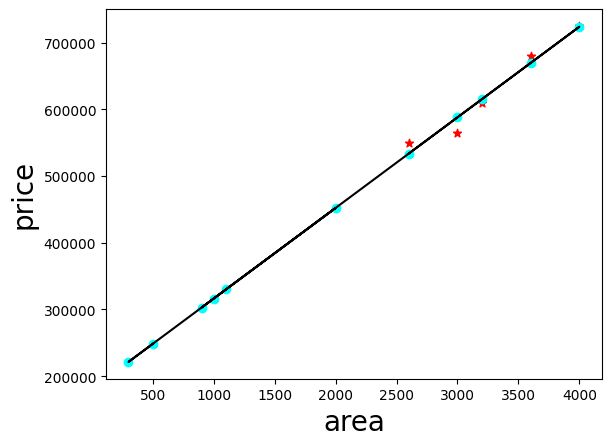

In [54]:
plt.xlabel('area',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.scatter(df.area,df.price,color="red",marker="*")
plt.plot(d.area,reg.predict(d[['area']]),color='black')
plt.scatter(d.area,reg.predict(d[['area']]),color='cyan')

# Appending the predicted data from the test to a new csv file
---
Now after running the following cell, if you check the file3.csv, it will contain the predicted 'price' values of all the 'area' values of test dataset.

In [56]:
import pandas as pd
data = {
	'area': d.area,
	'price': reg.predict(d[['area']]),
}
df = pd.DataFrame(data)
df.to_csv('file3.csv', mode='a', index=False, header=False)
print("Data appended successfully.")


Data appended successfully.
